<a href="https://colab.research.google.com/github/JyotirmaySaxena/JyotirmaySaxena/blob/main/cancer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

path = '/content/drive/MyDrive/cancermy_directory/cancer'

# Check if the directory exists
if not os.path.exists(path):
    # Create the directory
    os.mkdir(path)
    print("Directory created successfully!")
else:
    print("Directory already exists!")


Directory already exists!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
ROOT_DIR = "/content/drive/MyDrive/cancermy_directory"
number_of_images= {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]= len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [6]:
number_of_images.items()

dict_items([('pics', 5000), ('cancer', 0)])

In [7]:
len(os.listdir("/content/drive/MyDrive/cancermy_directory/cancer"))

0

# we will split datat:
70% train
15% valiadation
15% testing

In [8]:
def dataFolder(p, split):
  #train

  if not os.path.exists("./+p"):
    os.mkdir("./+p")

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./+p+/",dir)
      for img in np.random.choice(a =os.listdir(os.path.join(ROOT_DIR, dir)),
                                            size = (math.floor(split*number_of_images[dir])-2),
                                            replace=False ):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
    else:
      print(f"{p}the folder exists")

In [10]:
dataFolder("train", 0.7)

In [11]:
dataFolder("val", 0.15)

In [12]:
dataFolder("test", 1)

Model Building

In [13]:
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN MODEL

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16 , kernel_size=(3, 3), activation='relu',input_shape = (224, 224, 3) ))

model.add(Conv2D(filters=36 , kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64 , activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1 , activation= 'sigmoid'))

model.summary()

In [15]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing our Data using Data Generator

In [16]:
def preprocessingImages(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2,rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),batch_size=32,class_mode='binary')

  return image

In [17]:
path ="/content/drive/MyDrive/cancermy_directory"
train_data =preprocessingImages(path)

Found 5000 images belonging to 2 classes.


In [18]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(rescale=1/255,)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),batch_size=32,class_mode='binary')

  return image

In [19]:
path = "/content/drive/MyDrive/cancermy_directory"
test_data = preprocessingImages2(path)

Found 5000 images belonging to 2 classes.


In [20]:
path = "/content/drive/MyDrive/cancermy_directory"
val_data = preprocessingImages2(path)

Found 5000 images belonging to 2 classes.


In [21]:
# early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=3, verbose=1,mode='auto')

mc= ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd = [es,mc]

Model Training

In [22]:
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose=1, validation_data=val_data,validation_steps=16, callbacks=cd)

<ipython-input-22-1913788d0556>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator=train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9727
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./bestmodel.h5
8/8 [==============================] - 117s 2s/step - loss: 0.0840 - accuracy: 0.9727 - val_loss: 3.5945e-28 - val_accuracy: 1.0000
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
8/8 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
8/8 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4: val_accuracy did not im

In [23]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

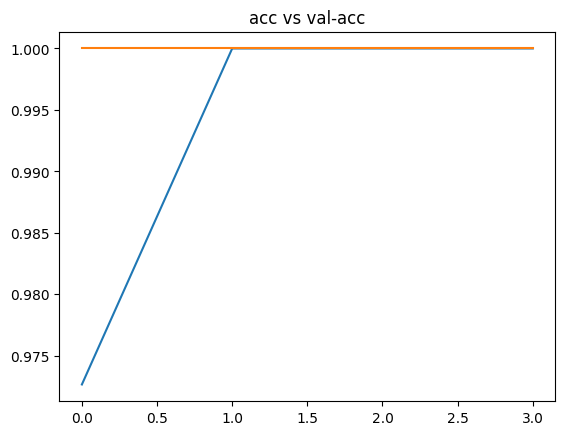

In [25]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()
